In [1]:
##import all packages
import pandas as pd
import os
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
import matplotlib 
import lightgbm as lgb
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

ModuleNotFoundError: No module named 'pandas'

In [3]:
#put your data directory here; 
dire='data/'
filenames=os.listdir(dire)
filenames[0]

'0-1-1.txt'

In [4]:
#Below is to read all files from the directory into Pandas DataFrame

In [5]:
df=pd.DataFrame()
for i in range(len(filenames)):
    with open('data/'+filenames[i]) as f: 
        for j, c in enumerate(f):
            if j in list([0,1,2,3]): 
                continue
            else: 
                c=c.replace('\t',' ')
                c=c.replace('\n',' ')
                temp=c.split()
                colnames=float(temp[0])
                colvalues=float(temp[1])
                df.loc[i,colnames]=colvalues
        df.loc[i,'group']=filenames[i][0:3]
    f.close() 

In [6]:
#just to check the shape of the dataFrame; Here, I have 116 samples and 1869 columns; each row is a ir spectra
df.shape

(116, 1869)

In [7]:
#"group" column refers to Y, like naocl concentration; originally it is 0ppm; I convert it to numeric number 0; 

In [8]:
df['group']=df['group'].apply(lambda x: x.split('-')[0])

In [9]:
df['group']=df['group'].astype('int64') #change to numberic data type

In [10]:
df['group'] #view the 'group' column; 

0      0
1      0
2      0
3      0
4      0
      ..
111    2
112    2
113    2
114    2
115    2
Name: group, Length: 116, dtype: int64

In [11]:
df.head() # see head of the data frame; 

,399.264912,401.193728,403.122544,405.05136,406.980176,408.908992,410.837808,412.766624,414.69544,416.624256,...,3984.933856,3986.862672,3988.791488,3990.720304,3992.64912,3994.577936,3996.506752,3998.435568,4000.364384,group
0,0.301701,0.294672,0.289537,0.289767,0.293918,0.291378,0.292264,0.293039,0.296029,0.294190,...,-0.005187,-0.005284,-0.005112,-0.004983,-0.005048,-0.005271,-0.005302,-0.005078,-0.004994,0
1,0.295744,0.301910,0.303336,0.298129,0.294406,0.294841,0.304971,0.300985,0.297749,0.298261,...,-0.010776,-0.010874,-0.010809,-0.010801,-0.010824,-0.010990,-0.011050,-0.010955,-0.010790,0
2,0.285480,0.275916,0.279928,0.281707,0.280182,0.266190,0.264748,0.274143,0.279980,0.272110,...,-0.006654,-0.006793,-0.006762,-0.006687,-0.006643,-0.006857,-0.006813,-0.006640,-0.006643,0
3,0.287223,0.284157,0.289416,0.292241,0.295322,0.292028,0.293807,0.291916,0.297062,0.299274,...,-0.006619,-0.006585,-0.006439,-0.006425,-0.006428,-0.006457,-0.006486,-0.006479,-0.006379,0
4,0.273319,0.280499,0.285928,0.284179,0.282532,0.273730,0.275887,0.277402,0.279600,0.281498,...,-0.007211,-0.007333,-0.007209,-0.007146,-0.007099,-0.007238,-0.007311,-0.007185,-0.007069,0


#below is to split the data into X and Y; 

In [12]:
train_set=df.drop(['group'],axis=1)
target=df['group']

In [13]:
target.values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [14]:
train_set.shape

(116, 1868)

PCA analysis

In [15]:
#standardize the data before runing PCA

In [16]:
stand = preprocessing.StandardScaler()
stand.fit(train_set)
data = stand.transform(train_set)

In [17]:
#fit the data with PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# reduced_data is the data obtained after PCA transformation; 
reduced_data =  pca.transform(data) 
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
le = preprocessing.LabelEncoder()
target_label=le.fit_transform(target)

Text(0.5, 1.0, 'PC plane with feature projections')

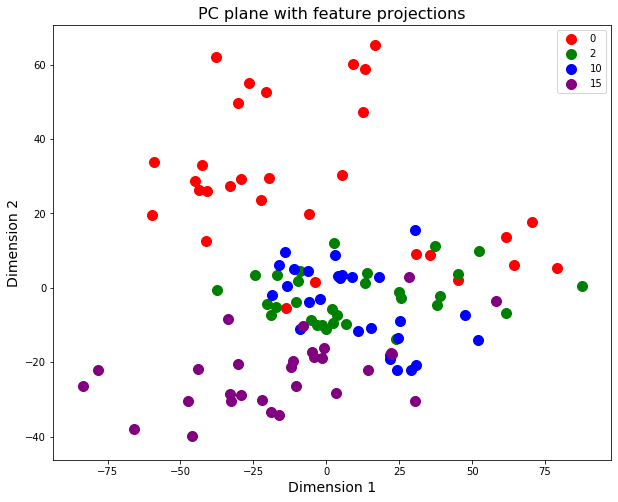

In [20]:
#below is PCA visualzation
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

colors = ['red','green','blue','purple']
labels=[0,2,10,15]
fig, ax = plt.subplots(figsize = (10,8))

#I used scatte plot; plot each naocl label separately; 
for g in np.unique(target_label):
    temp= target_label==g
    ax.scatter(x=reduced_data.loc[temp, 'Dimension 1'], y=reduced_data.loc[temp, 'Dimension 2'], c = colors[g], label = labels[g], s = 100)
#ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], s=70, alpha=0.5,c=target_label,label=colors,cmap=matplotlib.colors.ListedColormap(colors))
feature_vectors = pca.components_.T 

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.legend()
ax.set_title("PC plane with feature projections", fontsize=16)

In [21]:
#this is to see all components; 
dimensions = ['Dimension {}'.format(i) for i in range(2)]
components = pd.DataFrame(np.round(pca.components_, 4))
components.index = dimensions
components.columns=list(train_set.columns.values)
components

,399.264912,401.193728,403.122544,405.051360,406.980176,408.908992,410.837808,412.766624,414.695440,416.624256,...,3983.005040,3984.933856,3986.862672,3988.791488,3990.720304,3992.649120,3994.577936,3996.506752,3998.435568,4000.364384
Dimension 0,0.0036,0.0040,0.0039,0.0038,0.0040,0.0037,0.0037,0.0035,0.0031,0.0032,...,-0.0067,-0.0066,-0.0066,-0.0069,-0.0072,-0.0070,-0.0069,-0.0066,-0.0064,-0.0064
Dimension 1,-0.0337,-0.0334,-0.0330,-0.0329,-0.0329,-0.0330,-0.0331,-0.0333,-0.0335,-0.0338,...,0.0387,0.0388,0.0388,0.0386,0.0379,0.0382,0.0384,0.0385,0.0389,0.0390


In [22]:
#this is how much percentage of variance each component explains

pca.explained_variance_ratio_

array([0.56674644, 0.26950864])

### try with light gbm classification: 

In [23]:
#target_cf is the category of each y class; 
target_cf=target.astype('category')

In [24]:
#this  convert each y category to numbers that model can take
le = preprocessing.LabelEncoder()
target_cf=le.fit_transform(target_cf)

In [25]:
def run_cv(train_set,target,num_class): 
    #these are the hyperparameters for the model ; 
    param = {
    'objective': 'multiclass',
      'num_class':num_class,
       'metric': 'multi_logloss',
         'learning_rate': 0.0005,
         "boosting": "gbdt",
         "feature_fraction": 1,
         "bagging_freq": 1,
         "bagging_fraction": 0.7083 ,
         "bagging_seed": 11,
         "lambda_l1": 0.2634,
         "random_state": 133,
        "verbose": -1
        }
    folds = KFold(n_splits=5, shuffle=True, random_state=15) # 5 fold CV; 
    oof = np.zeros([len(train_set),num_class])
    feature_importance_df = pd.DataFrame()
    
    #below is to split the entire dataset into train and test sets; Train on train set and evaluate on test set
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_set.values, target)):
        print("fold n°{}".format(fold_))
        trn_data = lgb.Dataset(train_set.iloc[trn_idx], label=target[trn_idx],
                              )
                
        val_data = lgb.Dataset(train_set.iloc[val_idx], label=target[val_idx],
                               )
                    
        num_round = 10000
        clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [val_data],
                    verbose_eval=100,
                  )
    
        oof[val_idx,:] = clf.predict(train_set.iloc[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = train_set.columns
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    return feature_importance_df,oof 
#output feature importance dataframe and prediction result stored in oof; 

In [26]:
feature_importance_df_cf, oof_cf=run_cv(train_set,target_cf,4)
#train_set is the X,target_cf is the y,4: number of classs; 

fold n°0
[100]	valid_0's multi_logloss: 1.32152
[200]	valid_0's multi_logloss: 1.26121
[300]	valid_0's multi_logloss: 1.20422
[400]	valid_0's multi_logloss: 1.14805
[500]	valid_0's multi_logloss: 1.09475
[600]	valid_0's multi_logloss: 1.04508
[700]	valid_0's multi_logloss: 0.99992
[800]	valid_0's multi_logloss: 0.958385
[900]	valid_0's multi_logloss: 0.919197
[1000]	valid_0's multi_logloss: 0.883429
[1100]	valid_0's multi_logloss: 0.850432
[1200]	valid_0's multi_logloss: 0.81922
[1300]	valid_0's multi_logloss: 0.79013
[1400]	valid_0's multi_logloss: 0.762783
[1500]	valid_0's multi_logloss: 0.737023
[1600]	valid_0's multi_logloss: 0.713183
[1700]	valid_0's multi_logloss: 0.690794
[1800]	valid_0's multi_logloss: 0.669684
[1900]	valid_0's multi_logloss: 0.649626
[2000]	valid_0's multi_logloss: 0.63105
[2100]	valid_0's multi_logloss: 0.614034
[2200]	valid_0's multi_logloss: 0.597731
[2300]	valid_0's multi_logloss: 0.582162
[2400]	valid_0's multi_logloss: 0.567215
[2500]	valid_0's multi_log

[200]	valid_0's multi_logloss: 1.301
[300]	valid_0's multi_logloss: 1.24725
[400]	valid_0's multi_logloss: 1.19492
[500]	valid_0's multi_logloss: 1.14638
[600]	valid_0's multi_logloss: 1.10127
[700]	valid_0's multi_logloss: 1.05864
[800]	valid_0's multi_logloss: 1.01852
[900]	valid_0's multi_logloss: 0.981223
[1000]	valid_0's multi_logloss: 0.945323
[1100]	valid_0's multi_logloss: 0.911951
[1200]	valid_0's multi_logloss: 0.879211
[1300]	valid_0's multi_logloss: 0.848215
[1400]	valid_0's multi_logloss: 0.819019
[1500]	valid_0's multi_logloss: 0.791859
[1600]	valid_0's multi_logloss: 0.766198
[1700]	valid_0's multi_logloss: 0.741702
[1800]	valid_0's multi_logloss: 0.719591
[1900]	valid_0's multi_logloss: 0.697252
[2000]	valid_0's multi_logloss: 0.675473
[2100]	valid_0's multi_logloss: 0.655468
[2200]	valid_0's multi_logloss: 0.636061
[2300]	valid_0's multi_logloss: 0.618123
[2400]	valid_0's multi_logloss: 0.601254
[2500]	valid_0's multi_logloss: 0.584018
[2600]	valid_0's multi_logloss: 0

[300]	valid_0's multi_logloss: 1.25367
[400]	valid_0's multi_logloss: 1.18547
[500]	valid_0's multi_logloss: 1.11885
[600]	valid_0's multi_logloss: 1.05806
[700]	valid_0's multi_logloss: 1.00288
[800]	valid_0's multi_logloss: 0.952051
[900]	valid_0's multi_logloss: 0.90454
[1000]	valid_0's multi_logloss: 0.860243
[1100]	valid_0's multi_logloss: 0.819322
[1200]	valid_0's multi_logloss: 0.781067
[1300]	valid_0's multi_logloss: 0.745698
[1400]	valid_0's multi_logloss: 0.712148
[1500]	valid_0's multi_logloss: 0.680655
[1600]	valid_0's multi_logloss: 0.651504
[1700]	valid_0's multi_logloss: 0.62485
[1800]	valid_0's multi_logloss: 0.599132
[1900]	valid_0's multi_logloss: 0.575892
[2000]	valid_0's multi_logloss: 0.553381
[2100]	valid_0's multi_logloss: 0.532121
[2200]	valid_0's multi_logloss: 0.512204
[2300]	valid_0's multi_logloss: 0.493386
[2400]	valid_0's multi_logloss: 0.475577
[2500]	valid_0's multi_logloss: 0.458473
[2600]	valid_0's multi_logloss: 0.442371
[2700]	valid_0's multi_logloss

In [27]:
#to check overall prediction result; 
pred=np.zeros([len(oof_cf)])
for i in range(len(oof_cf)):
    pred[i]=np.argmax(oof_cf[i])
    cm=confusion_matrix(target_cf, pred)
1-sum(cm.diagonal())/np.sum(cm)  #this is overall prediction errors; 

0.10344827586206895

In [28]:
cm #confusion matrix; 

array([[28,  2,  0,  0],
       [ 2, 24,  4,  0],
       [ 0,  3, 24,  0],
       [ 0,  0,  1, 28]], dtype=int64)

In [29]:
cols = (feature_importance_df_cf[["feature", "importance"]]\
        .groupby("feature")\
        .mean()\
        .sort_values(by="importance", ascending=False).iloc[:50,:].index)

In [ ]:
cols

In [30]:
#roc and PR curve
#calculate ROC for a particular class
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4

y = label_binarize(target_cf, classes=[0, 1, 2,3])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], oof_cf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), oof_cf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

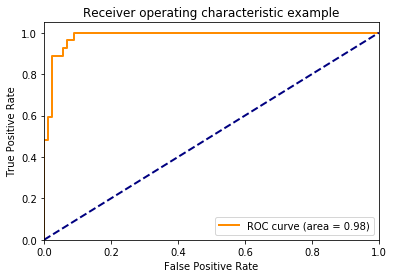

In [31]:
#plot roc for one class
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\Hemiao Cui\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.


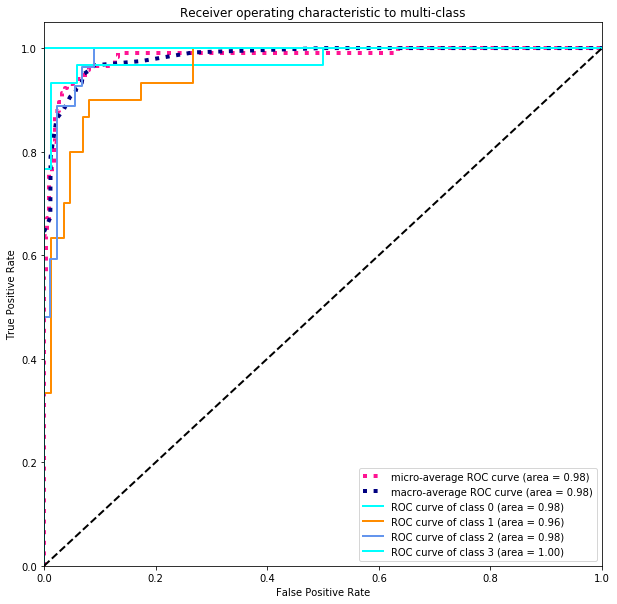

In [32]:
# Compute macro-average ROC curve and ROC area
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Confusion matrix, without normalization
[[28  2  0  0]
 [ 2 24  4  0]
 [ 0  3 24  0]
 [ 0  0  1 28]]


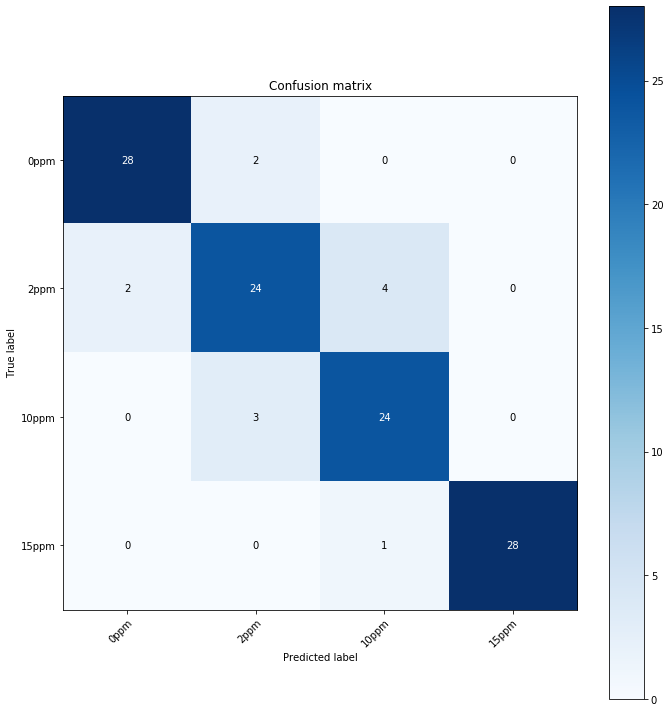

In [33]:
#plot confusion matrix in nicer way: 
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names=np.array(['0ppm','2ppm','10ppm','15ppm'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(target_cf, pred, classes=class_names,title='Confusion matrix')


plt.show()

In [ ]:
#plot the FTIR raw specra  if needed; 
plt.plot(train_set.columns,train_set.iloc[0,:])

In [ ]:
#plot feature importantance plot for baceria inactivation if needed; 
feature_importance_df_cf[["feature", "importance"]]\
        .groupby("feature")\
        .mean()\
        .sort_values(by="importance", ascending=False).iloc[:50,:]

In [ ]:
f_im=feature_importance_df_cf[["feature", "importance"]]\
        .groupby("feature")\
        .mean()

In [ ]:
spectra=df.iloc[0,:]

In [ ]:
f_im['spectra']=spectra

In [ ]:
f_im=f_im.reset_index()

In [ ]:
ax = f_im.plot(x="feature", y="importance", legend=False)
ax2 = ax.twinx()
f_im.plot(x="feature", y="spectra", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()